# trim_nearby_peaks
``trim_nearby_peaks`` function is a filter which finds nearby peaks in an image and removes the peak that is closer to the solid phase. This filter relies on the distance transform of an image.

## Import Packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
from edt import edt

## Generate Test Image
First an image is generated with shape 200 by 200 using the blobs generator. This image is used to demonstrate how to remove nearby peaks. The image is plotted using matplotlib's ``imshow`` to visualize the image before we apply the filter.

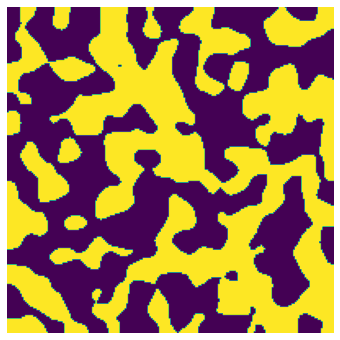

In [2]:
im = ps.generators.blobs(shape=[200, 200])

plt.figure(figsize=[6, 6]);
plt.axis(False);
plt.imshow(im);

## Apply Filter
Before we can apply the ``trim_nearby_peaks`` filter we need the distance transform and the peaks of the image. The distance transform is determined using the ``edt`` method while the peaks can be found using the ``find_peaks`` filter. This is shown as follows.

In [3]:
dt = edt(im)
peaks = ps.filters.find_peaks(dt, r_max=4)

Now we remove nearby peaks from the peaks image using the distance transfrom. The image returned is an array the same size as peaks containing a subset of the peaks in the original image. The peaks removed are visualized by comparing the original number of peaks before nearby peaks are trimmed to after. A yellow dot corresponds to a peak. It should be observed that the after image has fewer yellow dots relating to peaks being trimmed.

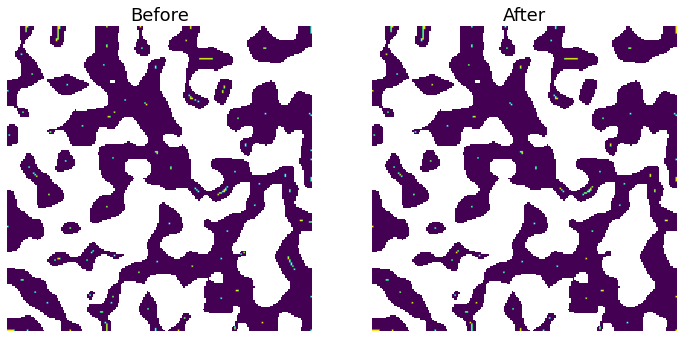

In [4]:
x = ps.filters.trim_nearby_peaks(peaks=peaks, dt=dt)

fix, ax = plt.subplots(1, 2, figsize=[12, 12])
ax[0].axis(False)
ax[0].imshow(peaks/im)
ax[0].set_title('Before', fontdict={'fontsize': 18});
ax[1].axis(False)
ax[1].imshow(x/im);
ax[1].set_title('After', fontdict={'fontsize': 18});